# Oltre la diversificazione

La diversificazione offre come vantaggio l'eliminazione del rischio specifico eliminando il più possibile i rischi si ottiene un portafoglio con il massimo rendimento per unità di rischio.

Questo metodo funziona abbastanza bene in tutte le condizioni di mercato, questo metodo ha alcuni limiti quali esso non funziona infatti quando ne abbiamo più bisogno cioè quando le cose vanno molto male pensiamo ad esempio nel 2008.

In parole più tecniche la diversificazione non ci può aiuare contro il **rischio sistematico**.

Analizziamo allora i limiti della diversificazione, andando a vedere quando i mercati crollano in termini di correlazione iniziamo con il caricare il nostro dataset dei rendimenti mensili dei vari settori industriali.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from dataset import get_ind_returns, get_ind_nfirms, get_ind_size

ind_return = get_ind_returns()

Cominciamo con il costruire un indice di mercato (abbiamo molti indici come ad esempio lo **sp500**) e da quello cominciamo a capire cosa succede alle correlazioni quando il mercato entra in crisi.

Quindi per costruire un indice di mercato di cosa abbiamo bisogno?

* Della capitalizzazione totale del mercato per ogni settore
* Il numero di aziende che compone il settore



In [2]:
ind_nfirms = get_ind_nfirms()
ind_size = get_ind_size()

In [3]:
ind_return.shape

(1110, 30)

In [4]:
ind_nfirms.shape

(1110, 30)

In [5]:
ind_size.shape

(1110, 30)

Analizziamo ora `ind_nfirms` e vediamo cosa contiene

In [6]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-08,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-09,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-10,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-11,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0


Per calcolare la capitalizzazione di mercato basterà moltiplicare il numero di aziende per la capitalizzazione

In [7]:
ind_mktcap = ind_nfirms * ind_size

In [8]:
ind_mktcap

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,655086.88,248864.40,246251.37,359322.24,34986.00,436335.51,291114.00,3101280.74,527004.08,18460.08,...,1194867.48,4823187.60,3246634.04,302188.62,702401.00,329067.65,2282934.94,428784.93,4930872.78,1432052.70
2018-09,650961.36,243994.20,232888.44,369482.88,33346.32,447087.81,305995.50,3233033.92,525412.88,19156.88,...,1229361.27,5069913.20,3562212.72,299831.35,720451.90,340645.57,2486473.99,442374.34,5037628.51,1473543.50
2018-10,638821.15,243073.92,242110.77,366408.00,32533.41,451597.38,309179.15,3288588.12,462370.35,17928.00,...,1250164.08,5043137.32,3546678.80,298376.14,727665.40,330246.60,2500872.76,453366.32,4930387.44,1488960.20
2018-11,644666.55,239183.23,261239.37,307688.02,30333.87,446944.29,277819.13,2990934.10,403502.22,13304.88,...,1237481.19,4559456.44,3258043.60,265650.12,656465.31,303814.75,2244299.82,445210.94,4583277.60,1399224.32


In [9]:
total_mktcap = ind_mktcap.sum(axis=1)
total_mktcap.tail()

2018-08    29949911.36
2018-09    30990177.46
2018-10    30918505.63
2018-11    28463290.74
2018-12    28851651.12
Freq: M, dtype: float64

<Axes: >

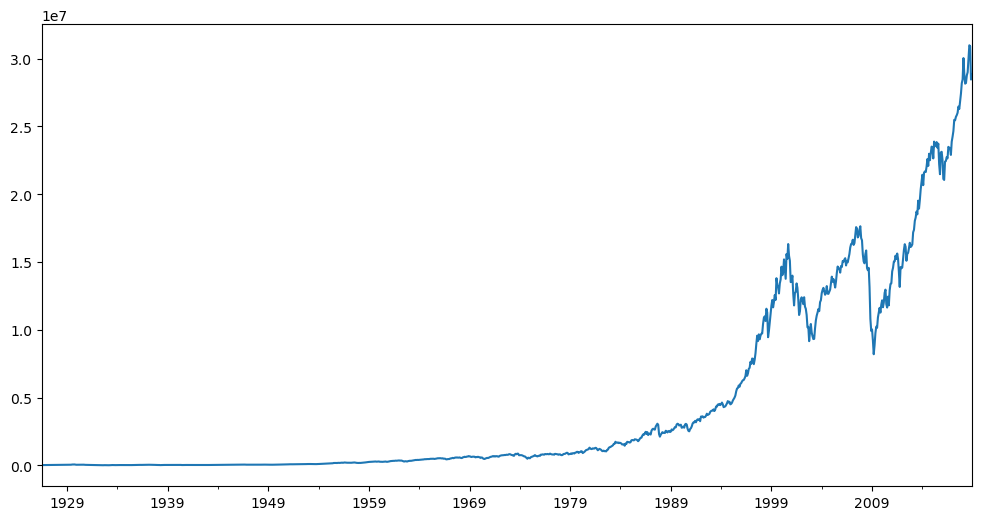

In [10]:
total_mktcap.plot(figsize=(12,6))

Vediamo che ci sono dei punti in cui i portafogli vengono messi a dura prova, vogliamo ora vedere il peso di ciascun settore al variare del tempo 

In [11]:
ind_capweight = ind_mktcap.divide(total_mktcap,axis=0)
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


visualizziamo l'andamento nel tempo della capitalizzazione dei seguenti settori

<Axes: >

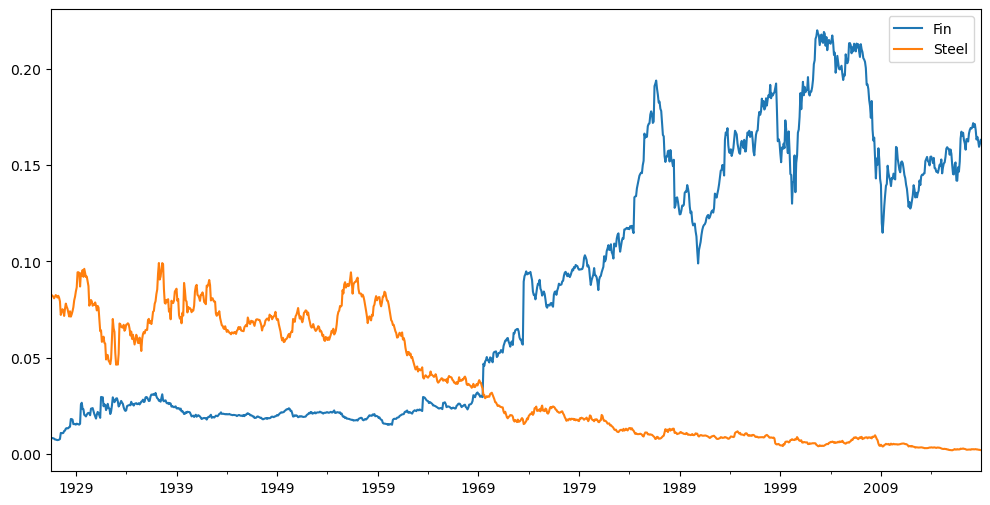

In [12]:
sectors = ["Fin","Steel"]
ind_capweight[sectors].plot(figsize=(12,6))

Una volta che abbiamo questi valori possiamo costruire il nostro indice simil **S&P500**, ad esempio cosa cosa rappresenta l'indice **S&P500** prende i 500 titoli con più capitalizzazione e poi calcola il portafolgio composto dai prezzi di queste società.

Calcoliamo dunque il nostro indice usando `ind_capweight` e moltiplicandolo per `ind_return`.

In [13]:
total_market_return = (ind_capweight * ind_return).sum(axis=1)
total_market_return.tail()

2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, dtype: float64

<Axes: >

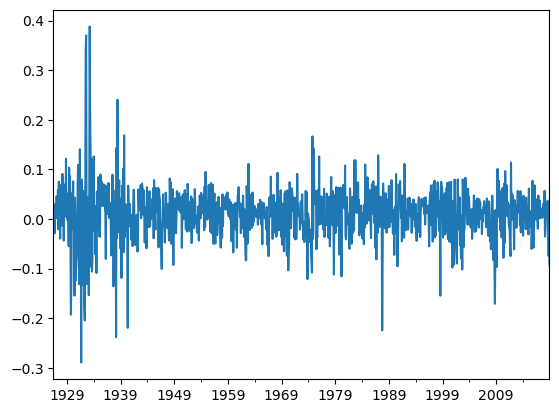

In [14]:
total_market_return.plot()

Il gioco è quasi fatto prediamo la nostra funzione drawdown e usando i rendimenti controlliamo il valore di `Wealth`.

In [15]:
from risk import drawdown

total_market_index = drawdown(total_market_return).Wealth

Ora se avessimo una finestra temporale di *3 anni* pari a *36 mesi* quali sarebbero stati i rendimenti? 
Useremo la funzione rolling che fa al nostro caso.

<Axes: title={'center': 'Total Market CapWeighted'}>

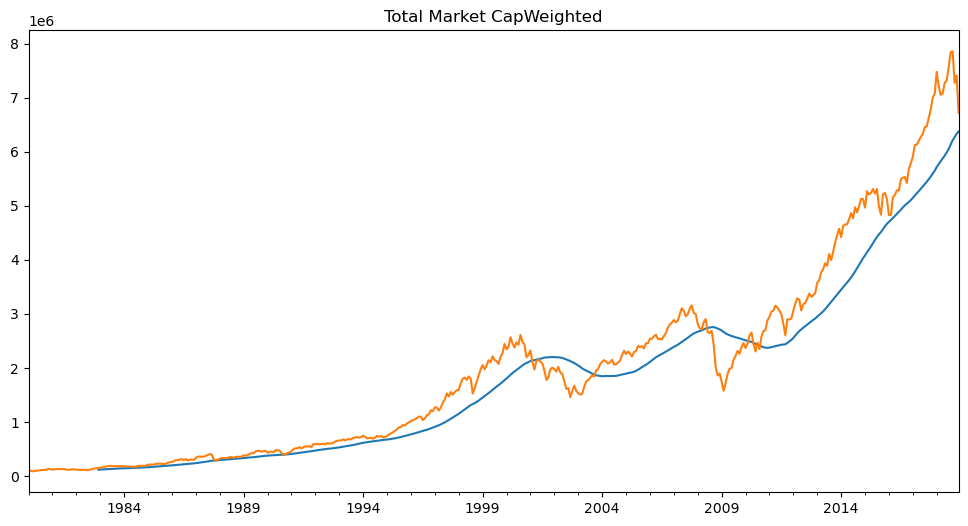

In [16]:
window_size = 36
total_market_index["1980":].rolling(window=window_size).mean().plot(figsize=(12,6))
total_market_index["1980":].plot(figsize=(12,6),title="Total Market CapWeighted")

Andiamo ad analizzare per la nostra finestra temporale i rendimenti annualizzati

<Axes: >

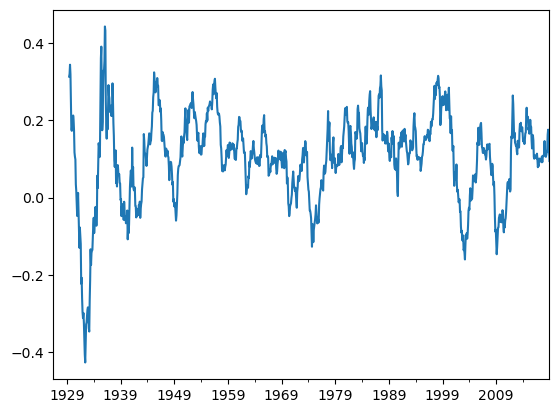

In [17]:
from risk import annualize_rets

ts_ret = total_market_return.rolling(window=window_size).aggregate(annualize_rets,periods_per_year=12)
ts_ret.plot()

## Rolling correlation

Come abbiamo fatto per i rendimenti vogliamo lavorare sulle correlazioni usando la finestra mobile.

In [18]:
ts_corr = ind_return.rolling(window=window_size).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

abbiamo ottenuto una time series con più indici il primo, una data il secondo una serie di colonne che da come possono essere viste come una matrice.


Diamo dei nomi alle colonne del nuovo indice creato.

In [19]:
ts_corr.index.names = ['date','industry']

In [20]:
ts_corr

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
1926-07 Food           NaN       NaN       NaN       NaN       NaN       NaN   
        Beer           NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke          NaN       NaN       NaN       NaN       NaN       NaN   
        Games          NaN       NaN       NaN       NaN       NaN       NaN   
        Books          NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
1926-07 Food           NaN       NaN       NaN       NaN  ...       NaN   
        Beer           NaN       NaN       NaN       NaN  ...       NaN   
        Smoke          NaN       NaN       NaN       NaN  ...       NaN   
        Games          NaN       NaN       NaN       NaN  ...       NaN   
        Books          NaN       NaN       NaN       NaN  ...       NaN   
...                    ...       ...       ...       ...  ...       ...   
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
1926-07 Food           NaN       NaN       NaN       NaN       NaN       NaN   
        Beer           NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke          NaN       NaN       NaN       NaN       NaN       NaN   
        Games          NaN       NaN       NaN       NaN       NaN       NaN   
        Books          NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
1926-07 Food           NaN       NaN       NaN  
        Beer           NaN       NaN       NaN  
        Smoke          NaN       NaN       NaN  
        Games          NaN       NaN       NaN  
        Books          NaN       NaN       NaN  
...                    ...       ...       ...  
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[33300 rows x 30 columns]

<Axes: xlabel='date'>

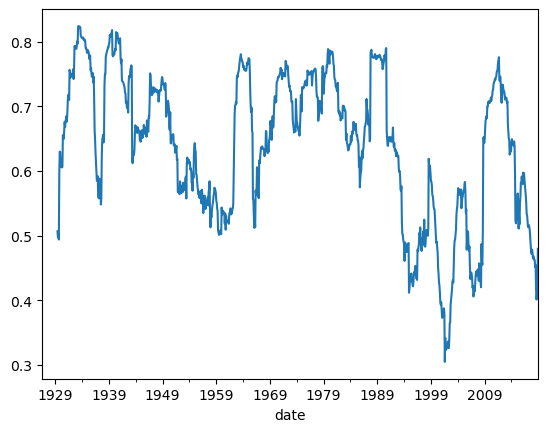

In [21]:
ind_wind_mean = ts_corr.groupby(level='date').apply(lambda cormat : cormat.values.mean())
ind_wind_mean.plot()

Vediamo subito una cosa la correlazione cambia parecchio nel tempo, in alcuni punti assume valori anche molto alti.
Mostriamo assieme i rendimenti e la correlazione 

<Axes: >

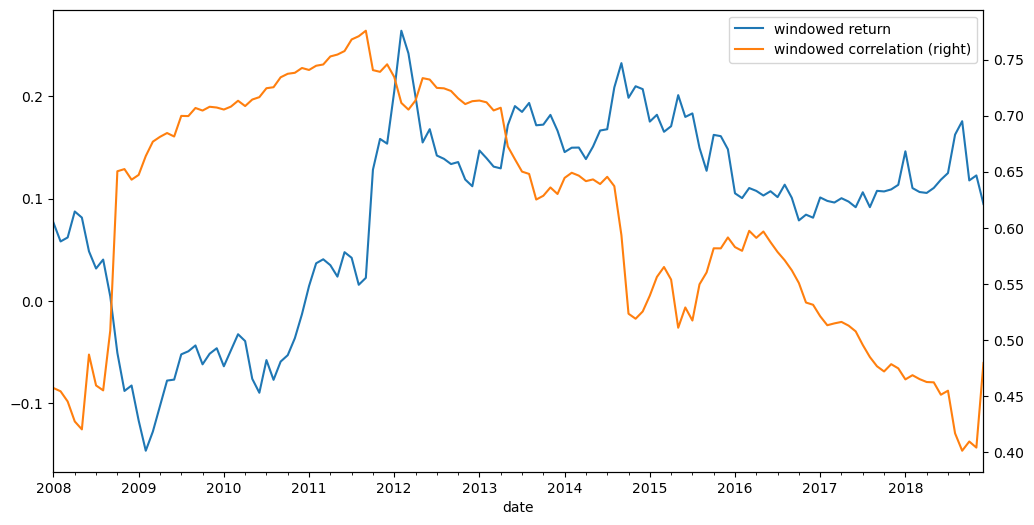

In [22]:
ts_ret["2008":].plot(label="windowed return",figsize=(12,6),legend=True)
ind_wind_mean["2008":].plot(label="windowed correlation",figsize=(12,6),secondary_y=True,legend=True)

Questo grafico mostra chiaramente una cosa (il 2008 è stato l'anno della crisi dei mutui americani) in caso di crollo dei mercati la diversificazione non aiuta!

### Introduzione alla CPPI Constant Proportion Portfolio Insurance


Le strategie **CPPI** sono molto usate, sono stare introdotte da Black e Jones nel 1987, è una procedura dinamica che alloca assett rischiosi e assett sicuri (buoni del tesoro).

Il principio dietro a questa strategia è abbastanza semplice si parte da un capitale minimo che si vuole sempre avere C, si sceglie poi un moltiplicatore M (vediamo dopo il calcolo).

Pensiamo poi al nostro capitale e al valore minino che ci possiamo permettere di avere, il valore da proteggere (Protection Floor F).

La differenza tra il valore patrimoniale e il valore minimo ci da il capitale che possiamo mettere a rischio (cushion C).


![CPPI](./img/05-CPPI.png)


Ora facciamo un esempio pratico, impostiamo il moltiplicatore **M** a 3 impostiamo la nostra perdita massima al 20% dunque il nostro capitale minimo rappresenterà l'80% del capitale iniziale. 

La domanda è se il nostro capitale iniziale rapprenta 100€ quanto dovremmo allocare come capitale a rischio?
Dunque vogliamo mettere a rishio 20€ che moltiplicati per M pari a 3 danno 60€ mettermo dunque i restanti 40€ in capitale sicuro.

Ora in base alla strategia se manteniamo monitorato la situazione, nulla potrà andare male, il problema sono i costi di transazione che rischiano di vanificare il nostro lavoro.

Di solito questi aggiornamenti avvengono mensilmente o trimestralmente, il problema è che potremmo superare la soglia di perdita che ci siamo imposti.

Il rischio di trovarsi sotto la soglia impostata viene chiamato **GAP Risk** possiamo dimostrare che il rischio di gap segue il seguente andamento


$$
\frac{1}{M}
$$

Facciamo un esempio supponiamo di impostare **M** a 5, 1 su M da 0.2 abbiamo dunque il 20% di probabilità di superare la soglia.
Priviamo dunque ad implementare l'algoritmo per comprenderlo meglio. i passi sono i seguenti:

1. Calcolo del **cushion** (cuscino) dato dal valore attuale del nostro asset meno il **Floor Value**
2. Calcolo del valore di allocazione dell'assett rischioso **M** * valore del peso dell'assett rischioso e dell'asset sicuro totale - assett rischioso
3. Ricalcolo del valore del nostro investimento


Cominciamo con l'estrarre i nostri assett rischiosi

In [23]:
sectors = ["Fin","Steel","Beer"]
risky_r = ind_return["2000":][sectors]

Creiamo un dataframe con i rendimenti mensili del nostro assett sicuro

In [24]:
annual_return = 0.03

safe_r = pd.DataFrame().reindex_like(risky_r)
safe_r.values[:] = annual_return/12 

impostiamo poi il nostro capitale iniziale pari a 1000€

In [25]:
start = 1000

Del nostro capitale iniziale vogliamo perdere al massimo il 20% impostiamo il floor al 80% e un valore di m pari a 3 

In [26]:
m = 3

floor = 0.80
floor_value = start*floor

In [27]:
account_value = start

creiamo i valori dello storico per la strategia

In [28]:
account_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)

In [29]:
for step in range(len(risky_r)):
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1-risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    # recompute the new account value at the end of this step
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    # save the histories for analysis and plotting
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value

Calcoliamo il rischio dell'investimeno a rischio puro

In [30]:
risky_wealth = start*(1+risky_r).cumprod()
risky_wealth

,Fin,Steel,Beer
2000-01,955.800000,972.300000,977.200000
2000-02,874.652580,1038.805320,863.453920
2000-03,1020.632096,1075.059626,864.576410
2000-04,977.255232,1066.029125,896.392822
2000-05,1026.704346,1013.580492,1002.794650
...,...,...,...
2018-08,3283.129665,1306.624224,4629.014147
2018-09,3219.765263,1297.869842,4637.809274
2018-10,3044.288056,1147.187153,4564.995669
2018-11,3132.267981,1112.771539,4829.308918


Per un settore a nostra scelta visualizziamo l'andamento

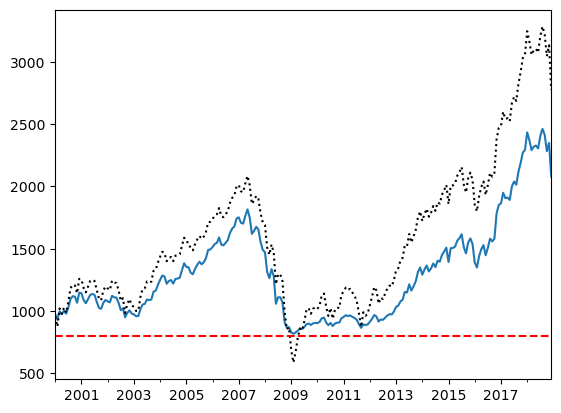

In [31]:
ind = "Fin"
ax = account_history[ind].plot()
risky_wealth[ind].plot(style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

Vediamo che a fronte di rendimenti potenziali minori non scendiamo sotto il valore di soglia

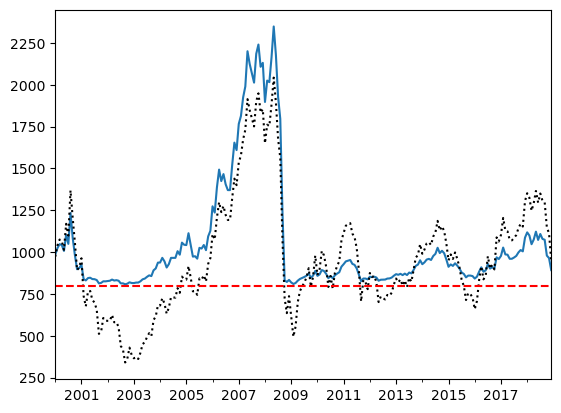

In [32]:
ind = "Steel"
ax = account_history[ind].plot()
risky_wealth[ind].plot(style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

Visualizziamo anche il valore dei pesi degli assett rischiosi al variare del tempo

<Axes: >

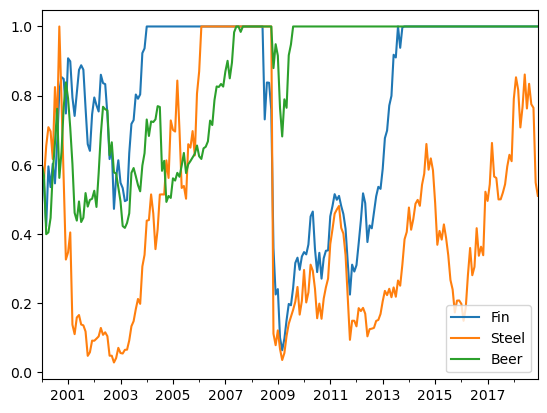

In [33]:
risky_w_history.plot()

Analizziamo nel dettaglio il settore **Beer** dopo il 2009 il peso della parte più rischiosa è sempre del 100% questo perchè ad un certo punto il guadagno fa si che il cuscino sia talmente ampio da coprire il 100% del portafoglio.

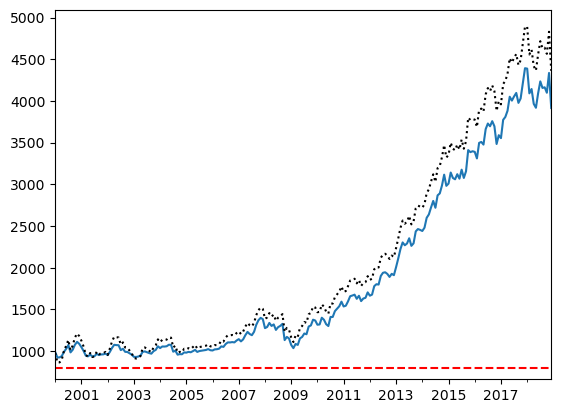

In [34]:
ind = "Beer"
ax = account_history[ind].plot()
risky_wealth[ind].plot(style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

Ora potremmo dire se il nostro portafoglio ha un valore di 3000€ che senso ha avere un floor_value di 800€ forse sarebbe meglio impostarlo a 2400€. Impostiamo un limite massimo di drawdown che siamo disposti a sopportare.

In [35]:
peak = 0
drawdown = 0.25

account_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)


for step in range(len(risky_r)):
    peak = np.maximum(peak, account_value)
    floor_value = peak*(1-drawdown)
    
    
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1-risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    # recompute the new account value at the end of this step
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    # save the histories for analysis and plotting
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value

<Axes: >

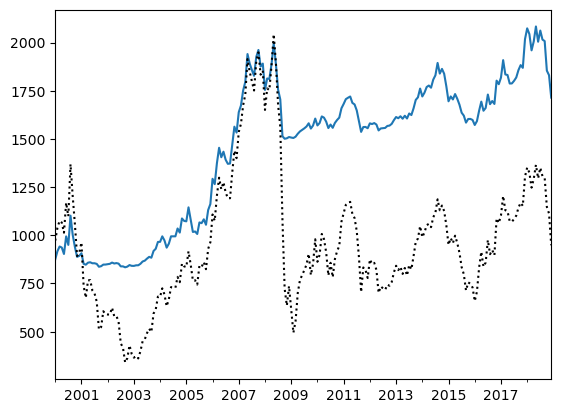

In [36]:
ind = "Steel"
ax = account_history[ind].plot()
risky_wealth[ind].plot(style="k:")

#### Simulazione dei rendimenti 

Proviamo ora a generare degli scenari significativi in merito ai rendimenti, utilizzeremo un modello **random walk** i mercati finanziari non sono prevedibili. Useremo delle simulazioni di **Monte Carlo**.

Iniziamo con il modellare le equazioni che regolano il modello.
Impostiamo S di t $S_t$ come il valore dell'assett rischioso al tempo t, impostiamo invece il valore dell'assett "sicuro" come B di t $B_t$.

Possiamo impostare il rendimento come:

$$
\frac{dS_t}{S_t}
$$

Nel dominio del continuo questa rappresenta la derivata. Vediamo come viene definita questa equazione.

$$
\frac{dS_t}{S_t} = \underbrace{(r + \sigma \lambda)dt}_\mu + \sigma dW_t
$$

Scomponiamo questa equazione la vedremo ancora meglio più avanti

![Walk](./img/06-randomwalk.png)


La parte risk free avendo un comportamento deterministico può essere scritta in modo molto più semplice.

$$
\frac{dB_t}{B_t} = rdtb \Leftrightarrow B_t = B_0 e^{rt}
$$

#### Moto Browniano

Il moto browniano è stato scoperto all'inizio del 1900 da Louis Bachelier, assomiglia ad una sorta di rumore o camminata casuale. Fu riscoperto nel 1905 fu riscoperto da Albert Einstein.

Che cosa è il moto browniano? è più facile da capire se si presenza in funzione discreta del tempo 

$$
    \frac{S_{t + \Delta t} - S_t}{S_t} = (r + \sigma \lambda)\Delta t + \sigma \sqrt{\Delta t} \xi_t
$$


La variabile casuale $\xi_t$ ha media zero e varianza uno ed è proprio il **rumore**, in questo processo non esiste correlazione e sia che venga da un momento crescente che da un momento decresente la probabilità di avere un risultato positivo o negativo è uguale.


Complichiamo ancora un pochino le cose abbiamo visto la formula generale ma nel tempo tutto cambia, i tassi di interesse ad esempio dunque $r$ non può essere considerata una variabile, allo stesso modo $\sigma$ non è costante dovremo usare $\sigma_t$.

Ora $\sigma_t$ possiamo considerarla come la radice quadrata dei rendimenti azionari $\sqrt{V_t}$ ancora una volta la volatilità e la varianza dei rendimenti azionari cambia nel tempo! Allo stesso modo anche $\lambda$ non può essere costante nel tempo.

Ora non solo i tassi di interesse sono osservabili ma tramite tecniche statistiche possiamo stimare anche volatilità e premi al rischio.

Quello che possiamo fare è introdurre processi stocastici anche per i parametri $r$ introducendo $r_t$

Iniziamo con il definire una base per la nostra simulazione

In [37]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices
    :param n_years:  The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g. Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    
    prices = s_0*(rets+1).cumprod()
    return prices
    

In [38]:
p = gbm(n_years=10, n_scenarios=1000, mu=0.07)

<Axes: >

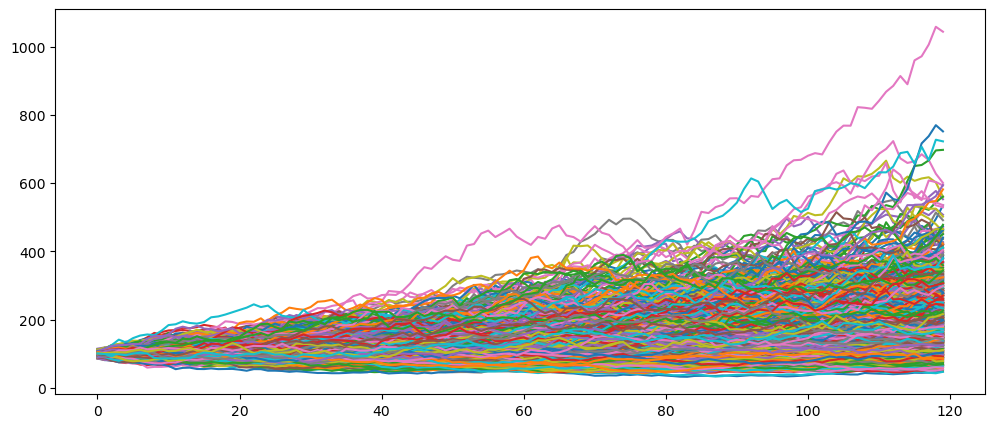

In [39]:
p.plot(figsize=(12,5), legend=False)

possiamo velocizzare la funzione di creazione

In [40]:
def gbm1(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices
    :param n_years:  The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g. Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(mu*dt+1), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [41]:
p = gbm1(n_years=10, n_scenarios=1000, mu=0.07)

<Axes: >

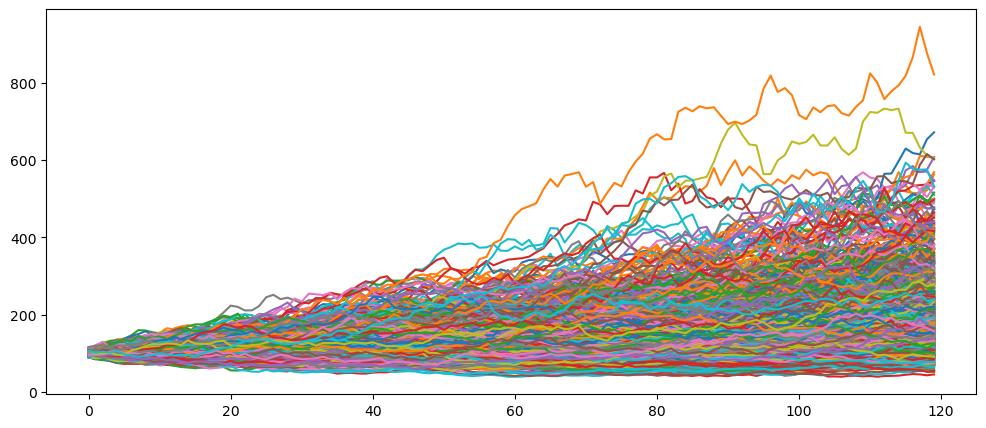

In [42]:
p.plot(figsize=(12,5), legend=False)

In [43]:
%timeit gbm1(n_years=5, n_scenarios=1000, mu=0.07)

2.07 ms ± 64.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
%timeit gbm(n_years=5, n_scenarios=1000, mu=0.07)

2.39 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
